In [42]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'insurance' dataset.
Path to dataset files: /kaggle/input/insurance


Dataset Shape: (1338, 7)

First 5 Rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Dataset Summary:
               age

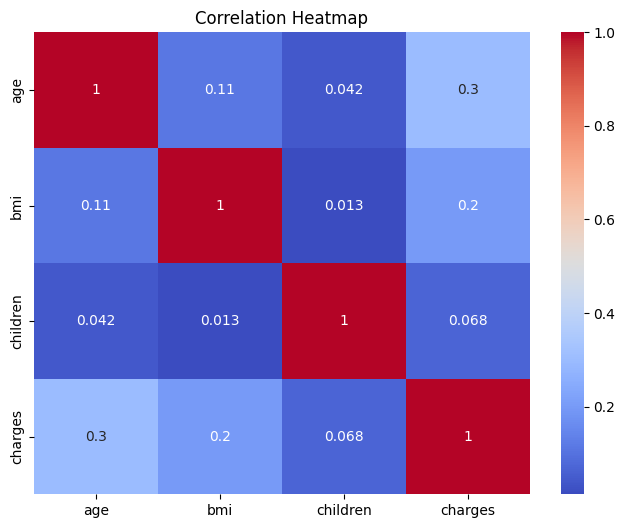

In [43]:
# 1. Import required libraries
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load the dataset
insurance = pd.read_csv(f"{path}/insurance.csv")

# 3. Explore the dataset
print("Dataset Shape:", insurance.shape)
print("\nFirst 5 Rows:")
print(insurance.head())

print("\nDataset Info:")
print(insurance.info())

print("\nDataset Summary:")
print(insurance.describe())

# 4. Check correlation with the target variable 'charges'
corr_matrix = insurance.corr(numeric_only=True)
print("\nCorrelation Matrix:")
print(corr_matrix["charges"].sort_values(ascending=False))

# 5. Visualize correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [44]:
# 1. Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load the dataset
insurance = pd.read_csv(f"{path}/insurance.csv")

# 3. View columns
print("Columns in dataset:", insurance.columns)

# 4. Show first few rows
insurance.head()

Columns in dataset: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
corr_matrix = insurance.corr(numeric_only=True)
corr_with_charges = corr_matrix["charges"].sort_values(ascending=False)
print("Correlation with charges:\n", corr_with_charges)

Correlation with charges:
 charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


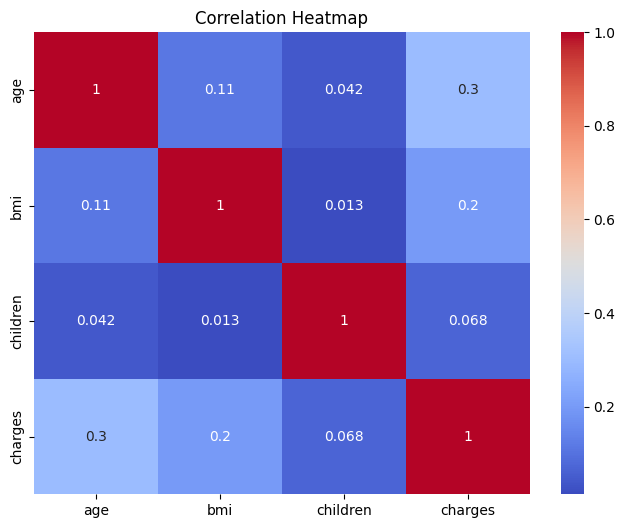

In [46]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

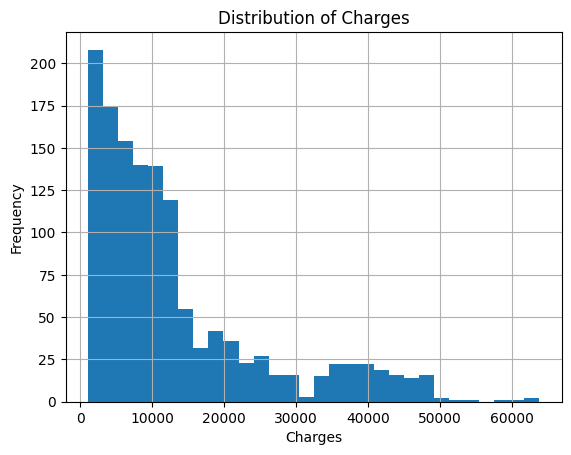

In [47]:
insurance["charges"].hist(bins=30)
plt.title("Distribution of Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

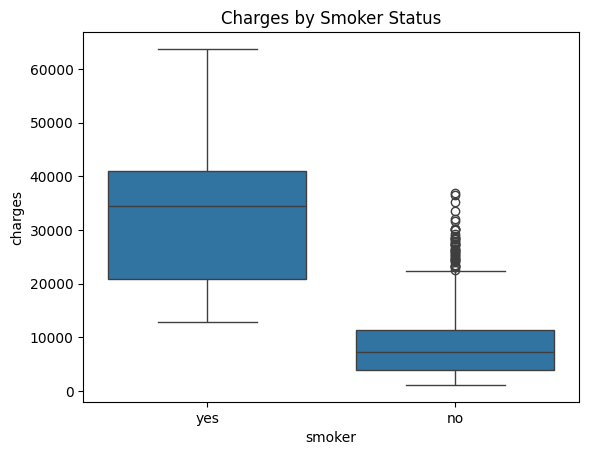

In [48]:
sns.boxplot(x="smoker", y="charges", data=insurance)
plt.title("Charges by Smoker Status")
plt.show()

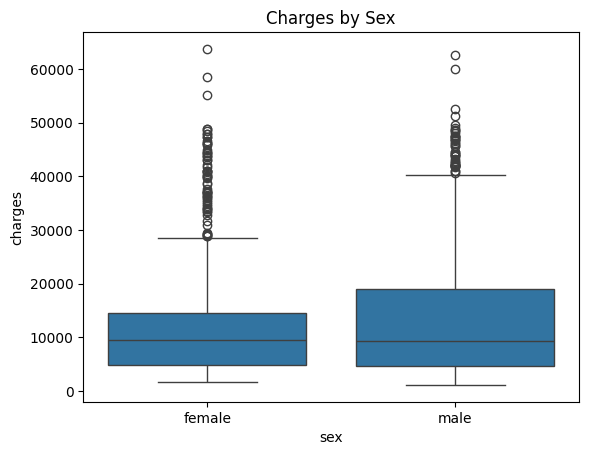

In [49]:
sns.boxplot(x="sex", y="charges", data=insurance)
plt.title("Charges by Sex")
plt.show()

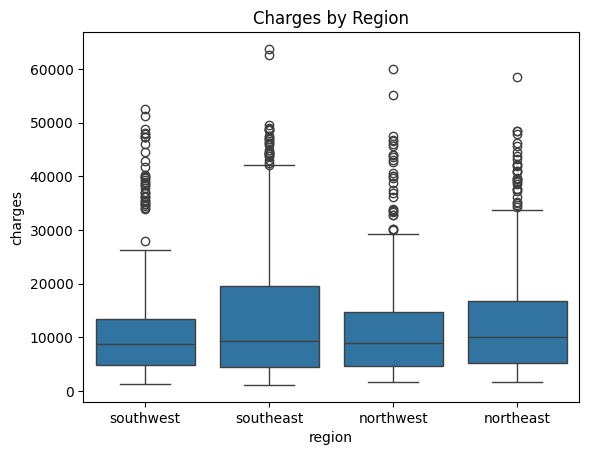

In [50]:
sns.boxplot(x="region", y="charges", data=insurance)
plt.title("Charges by Region")
plt.show()

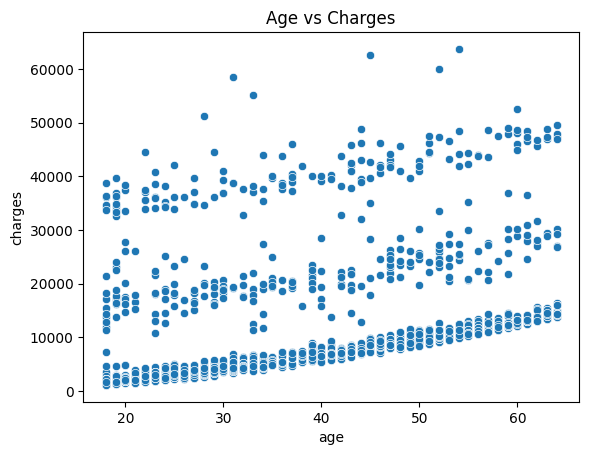

In [51]:
sns.scatterplot(x="age", y="charges", data=insurance)
plt.title("Age vs Charges")
plt.show()

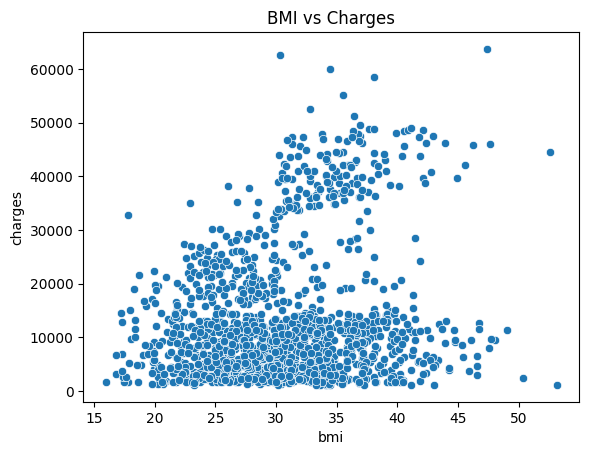

In [52]:
sns.scatterplot(x="bmi", y="charges", data=insurance)
plt.title("BMI vs Charges")
plt.show()

In [53]:
# Import train_test_split (if not already imported)
from sklearn.model_selection import train_test_split

# Choose predictor columns
X = insurance.drop("charges", axis=1)  # predictors
y = insurance["charges"]               # target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,   # 20% test data
    random_state=42   # ensures reproducibility
)

# Check the shape of the split data
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1070, 6)
Test set shape: (268, 6)


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
# Create the linear regression model
model = LinearRegression()

# Convert categorical features to numerical using one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=['sex', 'smoker', 'region'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['sex', 'smoker', 'region'], drop_first=True)

# Ensure columns match after encoding (important if categories are not identical across train/test)
# Reindex X_test_encoded to match X_train_encoded columns, filling new columns with 0
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Fit the model on the encoded training data
model.fit(X_train_encoded, y_train)

LinearRegression()

In [56]:
# Get model coefficients
coefficients = pd.DataFrame({
    "Feature": X_train_encoded.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coefficients

,Feature,Coefficient
4,smoker_yes,23651.128856
2,children,425.278784
1,bmi,337.092552
0,age,256.975706
3,sex_male,-18.591692
5,region_northwest,-370.677326
6,region_southeast,-657.864297
7,region_southwest,-809.799354


In [57]:
r2_train = model.score(X_train_encoded, y_train)
print("R² on training set:", r2_train)

R² on training set: 0.7417255854683333


In [58]:
# Predict on training data
y_train_pred = model.predict(X_train_encoded)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
print("MSE on training set:", mse_train)

MSE on training set: 37277681.70201867


In [59]:
# Fitted values (predictions on training data)
y_train_pred = model.predict(X_train_encoded)

# Residuals
residuals = y_train - y_train_pred

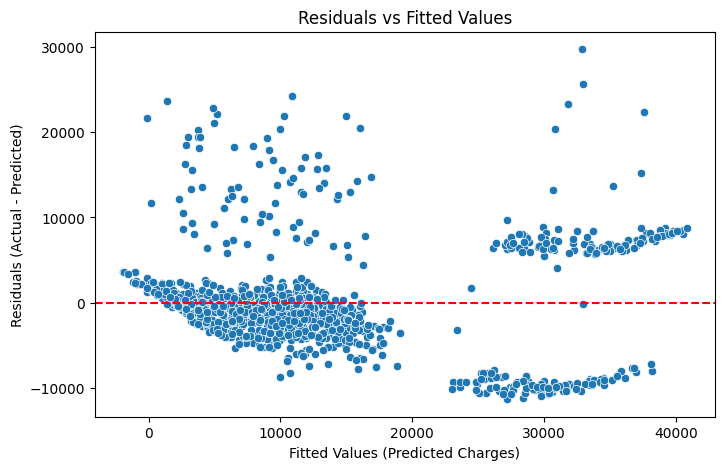

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values (Predicted Charges)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()

In [61]:
intercept = model.intercept_
intercept
coef_df = pd.DataFrame({
    "Feature": X_train_encoded.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coef_df

,Feature,Coefficient
4,smoker_yes,23651.128856
2,children,425.278784
1,bmi,337.092552
0,age,256.975706
3,sex_male,-18.591692
5,region_northwest,-370.677326
6,region_southeast,-657.864297
7,region_southwest,-809.799354


In [62]:
# Predict on test set
y_test_pred = model.predict(X_test_encoded)

In [63]:
from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(y_test, y_test_pred)
mse_test

33596915.85136145

In [64]:
print("Training MSE:", mse_train)
print("Test MSE:", mse_test)

Training MSE: 37277681.70201867
Test MSE: 33596915.85136145
